In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## electricty dataset

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/EurousZhao/Group-1/main/data/energy_dataset.csv?token=GHSAT0AAAAAACIGBLLDRTWKR5BKTA6NIGPMZLIL67Q'
ele = pd.read_csv(url)

In [ ]:
#ele = pd.read_csv('C:/Users/Eurous/Desktop/energy_dataset.csv')

show all colunms of dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
ele

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [5]:
nan_columns = ele.columns[ele.isna().any()].tolist()
nan_columns

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast wind offshore eday ahead',
 'total load actual']

delet all-zero or NAN colunms

In [6]:
del ele['generation fossil coal-derived gas']
del ele['generation fossil oil shale']
del ele['generation fossil peat']
del ele['generation geothermal']
del ele['generation wind offshore']
del ele['forecast wind offshore eday ahead']
del ele['generation hydro pumped storage aggregated']
del ele['generation marine']

In [7]:
ele.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [8]:
ele.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35064.000000,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,1439.066735,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,1677.703355,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,2636.000000,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [9]:
ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

change time column type( object transfor float)

In [10]:
# Convert 'time_column' to datetime
ele['time'] = pd.to_datetime(ele['time'],utc=True, infer_datetime_format=True)
ele = ele.set_index('time')



check have null value or not

In [11]:
ele.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


fill all nan and zero values

In [12]:
# Fill NaN values with a specific value (e.g., 0)
ele_filled = ele.fillna(0)

In [ ]:
# Fill NaN values with the mean of each column
ele_filled_mean = ele.fillna(ele.mean())

# Fill NaN values with the median of each column
ele_filled_median = ele.fillna(ele.median())

# Fill NaN values with the mode of each column
ele_filled_mode = ele.fillna(ele.mode().iloc[0])  # iloc[0] is used to get the first mode if multiple exist


In [13]:
# Forward fill NaN values (use the last valid observation to fill the next NaN)
ele_f = ele.fillna(method='ffill')

# Backward fill NaN values (use the next valid observation to fill the previous NaN)
ele_b = ele.fillna(method='bfill')

In [14]:
ele_f.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [18]:
ele_f

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30


In [19]:
print('Non-zero values in each column:\n', ele_f.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22449
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
forecast solar day ahead                       34525
forecast wind onshore day ahead                35064
total load forecast                            35064
total load actual                              35064
price day ahe

In [20]:
ele_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

## weather dataset

In [21]:
import pandas as pd

url = 'https://raw.githubusercontent.com/EurousZhao/Group-1/main/data/weather_features.csv?token=GHSAT0AAAAAACIGBLLCCZQT4E2O6PJDGOCMZLIMD2A'
wea = pd.read_csv(url)

In [ ]:
#import pandas
#wea= pd.read_csv('C:/Users/Eurous/Desktop/weather_features.csv')

In [22]:
wea

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [23]:
wea.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [24]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

change all int columns to float

To classify object values and thransform to number , that easy to identity

In [25]:
# Convert dt_iso to datetime type, rename it and set it as index

wea['time'] = pd.to_datetime(wea['dt_iso'], utc=True, infer_datetime_format=True)
wea = wea.drop(['dt_iso'], axis=1)
wea = wea.set_index('time')

In [26]:
wea

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 19:00:00+00:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 20:00:00+00:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [27]:
from sklearn.preprocessing import LabelEncoder

change all categorical value to numerical value with labelencoder

In [28]:
# Convert the list to a set to get unique values
unique_values = set(wea['weather_description'])

# Print the unique values
print("Unique Values:", unique_values)

Unique Values: {'haze', 'heavy intensity shower rain', 'thunderstorm', 'light snow', 'few clouds', 'overcast clouds', 'light intensity drizzle rain', 'shower sleet', 'light shower sleet', 'broken clouds', 'ragged shower rain', 'proximity thunderstorm', 'shower rain', 'proximity shower rain', 'light rain', 'mist', 'light shower snow', 'snow', 'smoke', 'light intensity shower rain', 'moderate rain', 'light rain and snow', 'thunderstorm with heavy rain', 'proximity drizzle', 'sky is clear', 'sleet', 'light thunderstorm', 'rain and drizzle', 'scattered clouds', 'heavy intensity drizzle', 'thunderstorm with rain', 'thunderstorm with light rain', 'light intensity drizzle', 'sand dust whirls', 'fog', 'drizzle', 'heavy snow', 'dust', 'very heavy rain', 'proximity moderate rain', 'heavy intensity rain', 'squalls', 'rain and snow'}


In [29]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column to numeric labels
wea['weather_description_numeric'] = label_encoder.fit_transform(wea['weather_description'])

# Print the mapping between original values and numeric labels
print("Original DataFrame:")
print(wea[['weather_description', 'weather_description_numeric']])

# Optionally, you can inverse transform to get back the original values
wea['weather_description'] = label_encoder.inverse_transform(wea['weather_description_numeric'])

del wea['weather_description']

Original DataFrame:
                          weather_description  weather_description_numeric
time                                                                      
2014-12-31 23:00:00+00:00        sky is clear                           33
2015-01-01 00:00:00+00:00        sky is clear                           33
2015-01-01 01:00:00+00:00        sky is clear                           33
2015-01-01 02:00:00+00:00        sky is clear                           33
2015-01-01 03:00:00+00:00        sky is clear                           33
...                                       ...                          ...
2018-12-31 18:00:00+00:00        sky is clear                           33
2018-12-31 19:00:00+00:00        sky is clear                           33
2018-12-31 20:00:00+00:00        sky is clear                           33
2018-12-31 21:00:00+00:00        sky is clear                           33
2018-12-31 22:00:00+00:00        sky is clear                           33

[178

In [30]:
# Convert the list to a set to get unique values
unique_values = set(wea['weather_main'])

# Print the unique values
print("Unique Values:", unique_values)

Unique Values: {'fog', 'haze', 'drizzle', 'dust', 'thunderstorm', 'mist', 'clear', 'squall', 'snow', 'smoke', 'clouds', 'rain'}


In [31]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column to numeric labels
wea['weather_main_numeric'] = label_encoder.fit_transform(wea['weather_main'])

# Print the mapping between original values and numeric labels
print("Original DataFrame:")
print(wea[['weather_main', 'weather_main_numeric']])

# Optionally, you can inverse transform to get back the original values
wea['weather_main'] = label_encoder.inverse_transform(wea['weather_main_numeric'])

del wea['weather_main']

Original DataFrame:
                          weather_main  weather_main_numeric
time                                                        
2014-12-31 23:00:00+00:00        clear                     0
2015-01-01 00:00:00+00:00        clear                     0
2015-01-01 01:00:00+00:00        clear                     0
2015-01-01 02:00:00+00:00        clear                     0
2015-01-01 03:00:00+00:00        clear                     0
...                                ...                   ...
2018-12-31 18:00:00+00:00        clear                     0
2018-12-31 19:00:00+00:00        clear                     0
2018-12-31 20:00:00+00:00        clear                     0
2018-12-31 21:00:00+00:00        clear                     0
2018-12-31 22:00:00+00:00        clear                     0

[178396 rows x 2 columns]


In [32]:
# Convert the list to a set to get unique values
unique_values = set(wea['weather_icon'])

# Print the unique values
print("Unique Values:", unique_values)

Unique Values: {'09n', '03', '01d', '03d', '04n', '09d', '10', '50n', '04d', '04', '11n', '03n', '50d', '02', '01', '02n', '11d', '13', '13n', '10n', '02d', '01n', '13d', '10d'}


In [33]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column to numeric labels
wea['weather_icon_numeric'] = label_encoder.fit_transform(wea['weather_icon'])

# Print the mapping between original values and numeric labels
print("Original DataFrame:")
print(wea[['weather_icon', 'weather_icon_numeric']])

# Optionally, you can inverse transform to get back the original values
wea['weather_icon'] = label_encoder.inverse_transform(wea['weather_icon_numeric'])

del wea['weather_icon']

Original DataFrame:
                          weather_icon  weather_icon_numeric
time                                                        
2014-12-31 23:00:00+00:00          01n                     2
2015-01-01 00:00:00+00:00          01n                     2
2015-01-01 01:00:00+00:00          01n                     2
2015-01-01 02:00:00+00:00          01n                     2
2015-01-01 03:00:00+00:00          01n                     2
...                                ...                   ...
2018-12-31 18:00:00+00:00          01n                     2
2018-12-31 19:00:00+00:00          01n                     2
2018-12-31 20:00:00+00:00          01n                     2
2018-12-31 21:00:00+00:00          01n                     2
2018-12-31 22:00:00+00:00          01n                     2

[178396 rows x 2 columns]


In [34]:
# Identify integer columns
int_columns = wea.select_dtypes(include='int').columns

# Convert integer columns to float
wea[int_columns] = wea[int_columns].astype(float)


In [35]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   city_name                    178396 non-null  object 
 1   temp                         178396 non-null  float64
 2   temp_min                     178396 non-null  float64
 3   temp_max                     178396 non-null  float64
 4   pressure                     178396 non-null  float64
 5   humidity                     178396 non-null  float64
 6   wind_speed                   178396 non-null  float64
 7   wind_deg                     178396 non-null  float64
 8   rain_1h                      178396 non-null  float64
 9   rain_3h                      178396 non-null  float64
 10  snow_3h                      178396 non-null  float64
 11  clouds_all                   178396 non-null  float64
 12  weather_id  

In [36]:
city = wea.groupby('city_name').mean()
city

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description_numeric,weather_main_numeric,weather_icon_numeric
city_name,,,,,,,,,,,,,,,
Barcelona,289.848248,288.594704,291.021987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465,19.750338,1.337242,5.512375
Bilbao,286.378489,284.916661,288.036687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228,16.230870,2.388529,9.067342
Madrid,288.061071,286.824877,289.155600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264,23.811757,1.166350,5.371605
Seville,293.105431,291.184103,295.962431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849,25.926400,0.990213,4.774081
Valencia,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283,19.604069,0.946479,4.648286


In [37]:
wea.isnull().sum()

city_name                      0
temp                           0
temp_min                       0
temp_max                       0
pressure                       0
humidity                       0
wind_speed                     0
wind_deg                       0
rain_1h                        0
rain_3h                        0
snow_3h                        0
clouds_all                     0
weather_id                     0
weather_description_numeric    0
weather_main_numeric           0
weather_icon_numeric           0
dtype: int64

## merge datasets

combine 2 datasets
ele: 35064 rows × 29 columns
wea: 178396 rows × 16 columns

In [38]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in wea.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [39]:
# Merge all dataframes into the final dataframe

final = ele_f

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    final = final.merge(df, on=['time'], how='outer')
    final = final.drop('city_name_{}'.format(city_str), axis=1)

final

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,weather_id_Barcelona,weather_description_numeric_Barcelona,weather_main_numeric_Barcelona,weather_icon_numeric_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,rain_3h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,weather_id_Bilbao,weather_description_numeric_Bilbao,weather_main_numeric_Bilbao,weather_icon_numeric_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,rain_3h_Madrid,snow_3h_Madrid,clouds_all_Madrid,weather_id_Madrid,weather_description_numeric_Madrid,weather_main_numeric_Madrid,weather_icon_numeric_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,rain_3h_Seville,snow_3h_Seville,clouds_all_Seville,weather_id_Seville,weather_description_numeric_Seville,weather_main_numeric_Seville,weather_icon_numeric_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_id_Valencia,weather_description_numeric_Valencia,weather_main_numeric_Valencia,weather_icon_numeric_Valencia
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.657312,269.657312,269.657312,1036.0,97.0,0.0,226.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,0.0,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.763500,269.763500,269.763500,1035.0,97.0,0.0,229.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,0.0,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.251688,269.251688,269.251688,1036.0,97.0,1.0,224.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,0.0,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,0.0,0.0,80

In [40]:
final.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp_Barcelona', 'temp_min_Barcelona',
       'temp_max_Barcelona', 'pressure_Barcelona', 'humidity_Barcelona',
       'wind_speed_Barcelona', 'wind_deg_Barcelona', 'rain_1h_Barcelona',
       'rain_3h_Barcelona', 'snow_3h_Barcelona', 'clouds_all_Barcelona',
       'weather_id_Barcelona', 'weather_description_numeric_Barcelona',
       'weather_main_numeric_Barcelona', 'wea

In [41]:
print('There are {} missing values or NaNs in df_final.'
      .format(final.isnull().values.sum()))

There are 0 missing values or NaNs in df_final.


In [42]:
type(final.index)

pandas.core.indexes.datetimes.DatetimeIndex

## EDA

In [43]:
final.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,weather_id_Barcelona,weather_description_numeric_Barcelona,weather_main_numeric_Barcelona,weather_icon_numeric_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,rain_3h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,weather_id_Bilbao,weather_description_numeric_Bilbao,weather_main_numeric_Bilbao,weather_icon_numeric_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,rain_3h_Madrid,snow_3h_Madrid,clouds_all_Madrid,weather_id_Madrid,weather_description_numeric_Madrid,weather_main_numeric_Madrid,weather_icon_numeric_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,rain_3h_Seville,snow_3h_Seville,clouds_all_Seville,weather_id_Seville,weather_description_numeric_Seville,weather_main_numeric_Seville,weather_icon_numeric_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_id_Valencia,weather_description_numeric_Valencia,weather_main_numeric_Valencia,weather_icon_numeric_Valencia
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.657312,269.657312,269.657312,1036.0,97.0,0.0,226.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,0.0,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.763500,269.763500,269.763500,1035.0,97.0,0.0,229.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,0.0,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.251688,269.251688,269.251688,1036.0,97.0,1.0,224.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,0.0,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,0.0,0.0,80

In [44]:
final.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,weather_id_Barcelona,weather_description_numeric_Barcelona,weather_main_numeric_Barcelona,weather_icon_numeric_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,rain_3h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,weather_id_Bilbao,weather_description_numeric_Bilbao,weather_main_numeric_Bilbao,weather_icon_numeric_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,rain_3h_Madrid,snow_3h_Madrid,clouds_all_Madrid,weather_id_Madrid,weather_description_numeric_Madrid,weather_main_numeric_Madrid,weather_icon_numeric_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,rain_3h_Seville,snow_3h_Seville,clouds_all_Seville,weather_id_Seville,weather_description_numeric_Seville,weather_main_numeric_Seville,weather_icon_numeric_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_id_Valencia,weather_description_numeric_Valencia,weather_main_numeric_Valencia,weather_icon_numeric_Valencia
count,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,3.856800e+04,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.0,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.0,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000
mean,380.928983,450.025539,5638.122122,4250.320732,297.444928,472.165733,975.665292,2609.965438,6264.455870,59.887705,86.198169,1405.146572,271.056083,5500.545815,1413.878837,5507.091786,28748.911818,28739.510864,50.127499,58.103659,289.588446,288.346369,290.748159,1.262472e+03,74.348424,2.773387,186.877852,0.115495,0.000301,0.0,23.880704,758.637705,19.678568,1.385864,5.640090,286.212638,284.719394,287.912341,1017.260838,78.993388,1.990588,159.021961,0.121274,0.001044,0.021864,44.058961,723.598475,16.150462,2.402899,9.134801,287.847982,286.605950,288.946696,1012.080248,60.568217,2.443969,173.352468,0.058689,0.000121,0.000027,23.165007,759.768176,23.606176,1.220909,5.547630,292.864015,290.897275,295.792058,1018.268072,65.025021,2.525539,152.093834,0.051268,0.000166,

In [45]:
final1 = final

In [46]:
final2 = final

In [47]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38568 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 95 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           38568 non-null  float64
 1   generation fossil brown coal/lignite         38568 non-null  float64
 2   generation fossil gas                        38568 non-null  float64
 3   generation fossil hard coal                  38568 non-null  float64
 4   generation fossil oil                        38568 non-null  float64
 5   generation hydro pumped storage consumption  38568 non-null  float64
 6   generation hydro run-of-river and poundage   38568 non-null  float64
 7   generation hydro water reservoir             38568 non-null  float64
 8   generation nuclear                           38568 non-null  float64
 9   generation other         

In [48]:
final.isnull().sum()

generation biomass                      0
generation fossil brown coal/lignite    0
generation fossil gas                   0
generation fossil hard coal             0
generation fossil oil                   0
                                       ..
clouds_all_Valencia                     0
weather_id_Valencia                     0
weather_description_numeric_Valencia    0
weather_main_numeric_Valencia           0
weather_icon_numeric_Valencia           0
Length: 95, dtype: int64

In [49]:
final.tail()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,weather_id_Barcelona,weather_description_numeric_Barcelona,weather_main_numeric_Barcelona,weather_icon_numeric_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,rain_3h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,weather_id_Bilbao,weather_description_numeric_Bilbao,weather_main_numeric_Bilbao,weather_icon_numeric_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,rain_3h_Madrid,snow_3h_Madrid,clouds_all_Madrid,weather_id_Madrid,weather_description_numeric_Madrid,weather_main_numeric_Madrid,weather_icon_numeric_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,rain_3h_Seville,snow_3h_Seville,clouds_all_Seville,weather_id_Seville,weather_description_numeric_Seville,weather_main_numeric_Seville,weather_icon_numeric_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_id_Valencia,weather_description_numeric_Valencia,weather_main_numeric_Valencia,weather_icon_numeric_Valencia
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02,284.13,282.15,286.15,1027.0,71.0,1.0,250.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,281.26,280.15,282.15,1033.0,93.0,0.0,57.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,283.56,282.15,285.15,1030.0,88.0,1.0,280.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,287.76,287.15,288.15,1028.0,54.0,3.0,30.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,285.64,285.15,286.15,1028.0,62.0,2.0,140.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16,282.64,281.15,284.15,1027.0,62.0,3.0,270.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,279.81,278.15,281.15,1034.0,93.0,1.0,0.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,280.12,278.15,281.15,1031.0,52.0,1.0,260.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,285.76,285.15,286.15,1029.0,62.0,3.0,30.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,283.14,282.15,284.15,1029.0,71.0,1.0,242.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30,282.14,280.15,284.15,1028.0,53.0,4.0,300.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,277.15,277.15,277.15,1034.0,100.0,1.0,140.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,278.15,278.15,278.15,1030.0,65.0,1.0,340.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,285.15,285.15,285.15,1028.0,58.0,4.0,50.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,281.66,281.15,282.15,1029.0,81.0,3.0,300.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0
2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89,281.13,278.15,284.15,1028.0,50.0,5.0,320.0,0.0,0.0,0.0,0.0,800.0,33.0,0.0,2.0,276.60,276.15,277.15,1034.0,93.0,1.0,120.0,0.0,0.0,0.0,0.0,800.0

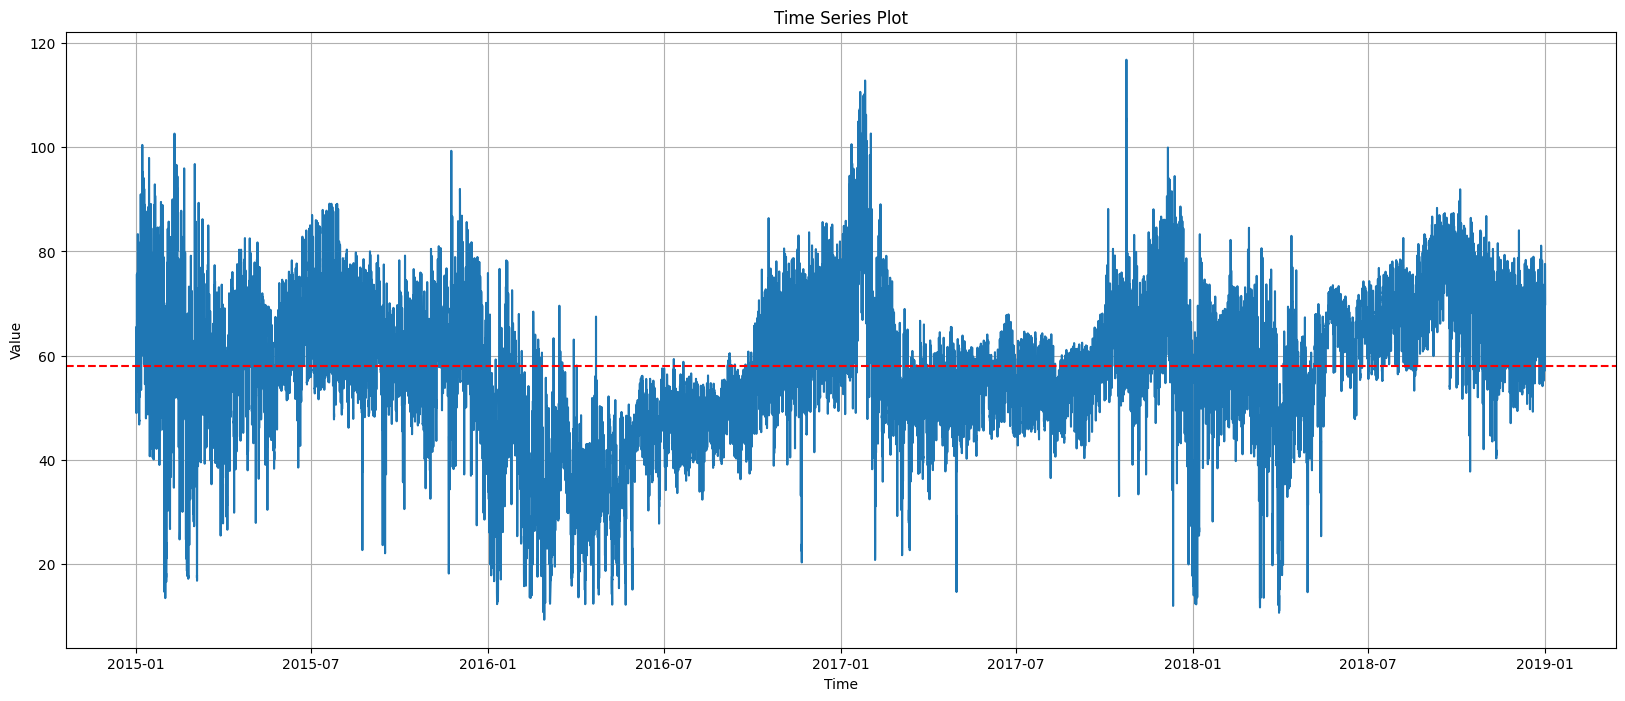

In [50]:
import seaborn as sns

average_value = final['price actual'].mean()


# Seaborn line plot
plt.figure(figsize=(20, 8))
sns.lineplot(x=final.index, y=final['price actual'])

# Add the average line
plt.axhline(y=average_value, color='r', linestyle='--', label='Average')

plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


plot one year (2015-2019)

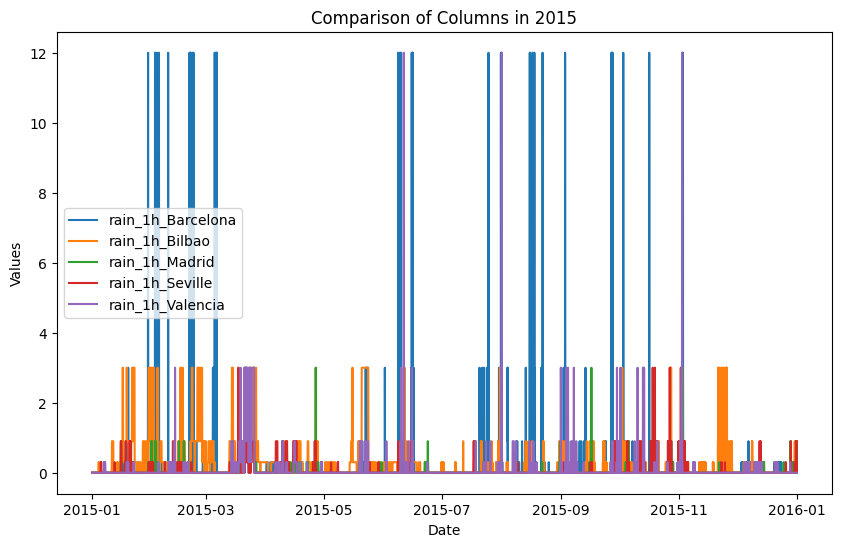

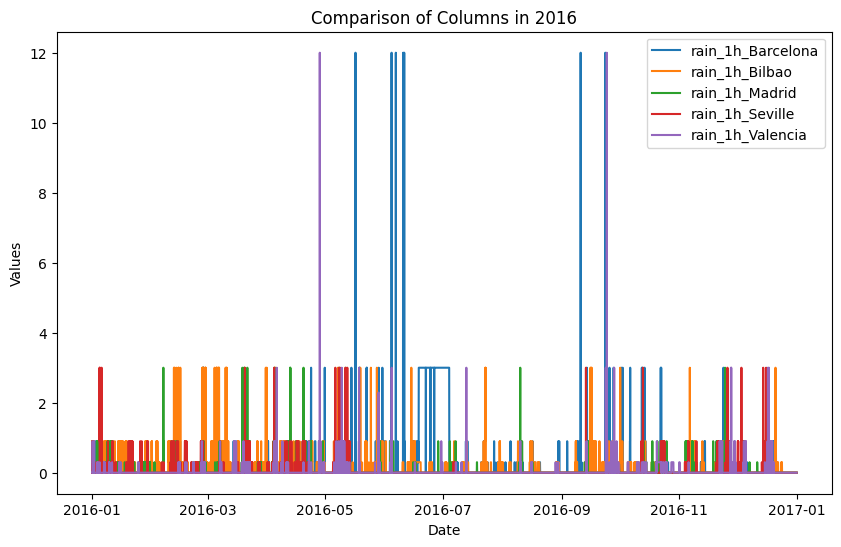

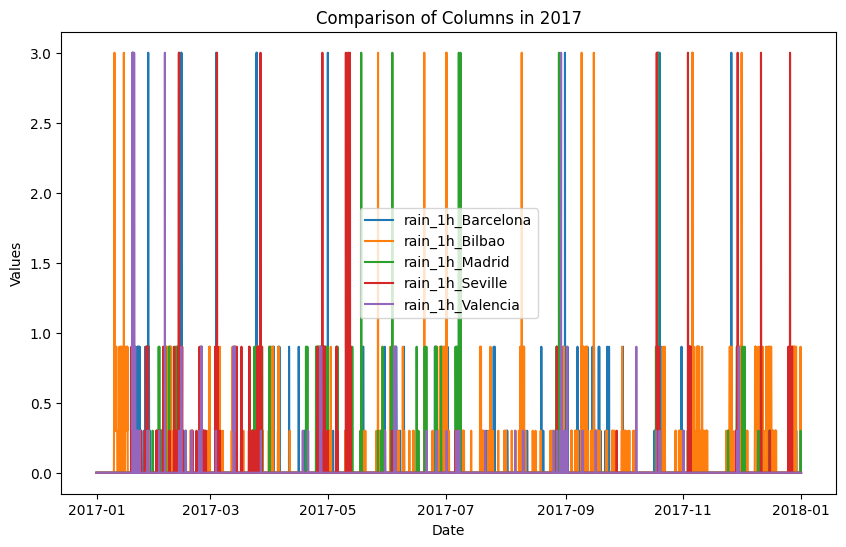

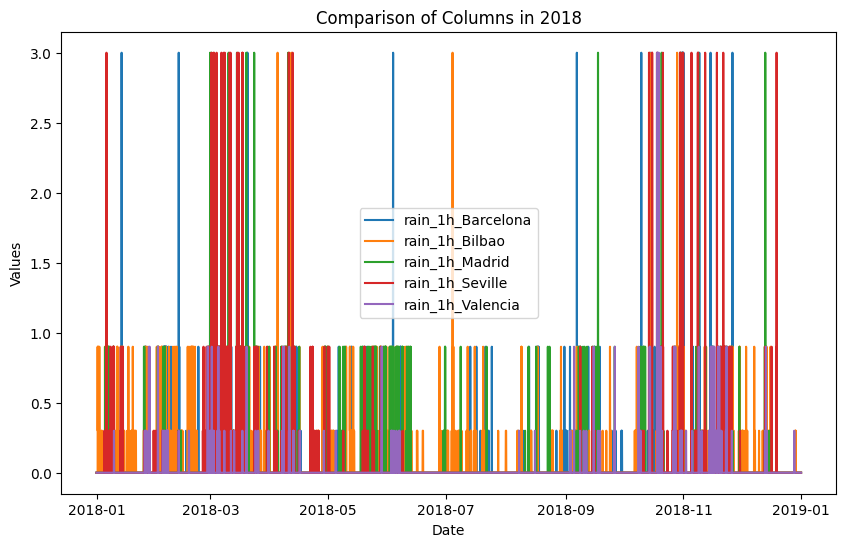

In [51]:
# Extract years from the dateindex
final['year'] = final.index.year

# Create a separate graph for each year
for year in range(2015, 2019):
    # Filter data for the specific year
    year_data = final[final['year'] == year]

    # Plot a line graph for each column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for column in final[["rain_1h_Barcelona", "rain_1h_Bilbao", "rain_1h_Madrid", "rain_1h_Seville", "rain_1h_Valencia"]]:
        plt.plot(year_data.index, year_data[column], label=column)

    plt.title(f'Comparison of Columns in {year}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

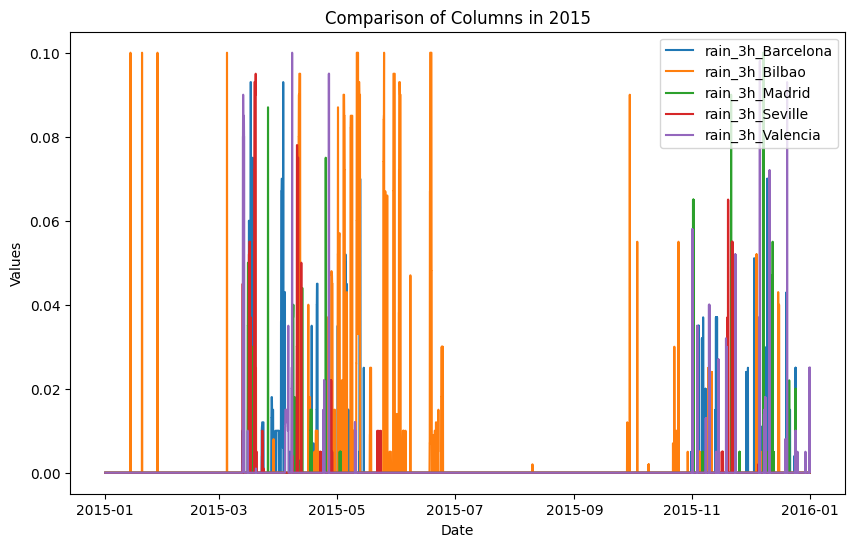

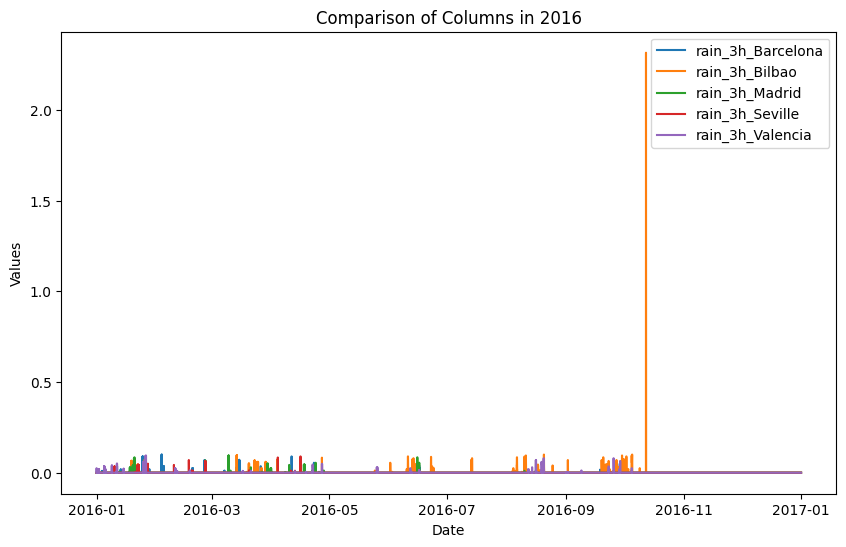

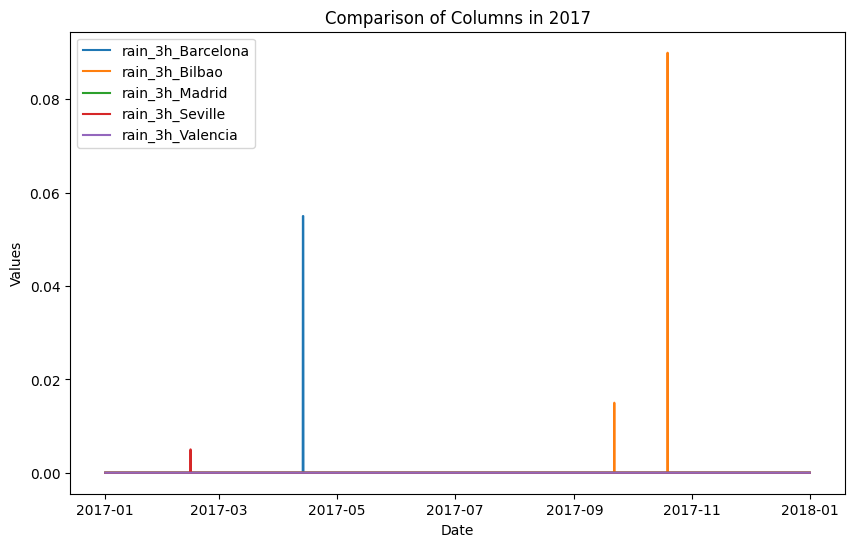

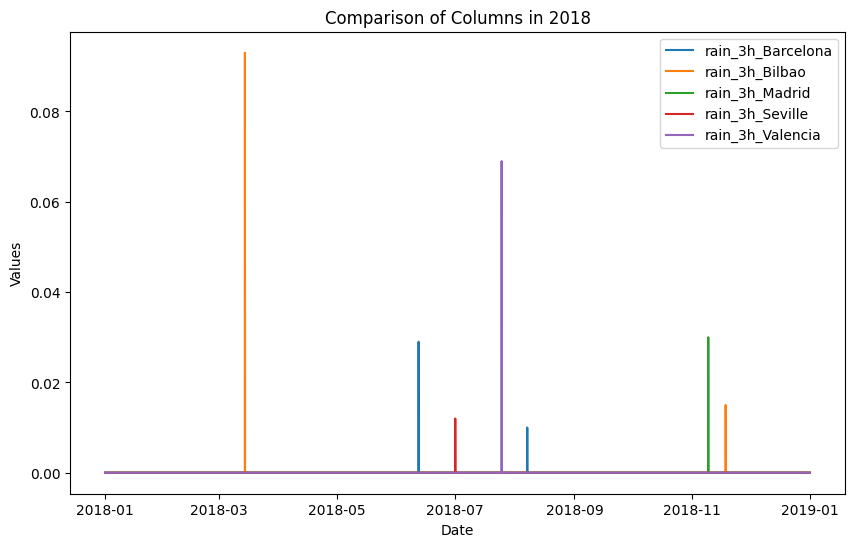

In [52]:
# Extract years from the dateindex
final['year'] = final.index.year

# Create a separate graph for each year
for year in range(2015, 2019):
    # Filter data for the specific year
    year_data = final[(final['year'] == year)]

    # Plot a line graph for each column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for column in final[["rain_3h_Barcelona", "rain_3h_Bilbao", "rain_3h_Madrid", "rain_3h_Seville", "rain_3h_Valencia"]]:
        plt.plot(year_data.index, year_data[column], label=column)

    plt.title(f'Comparison of Columns in {year}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


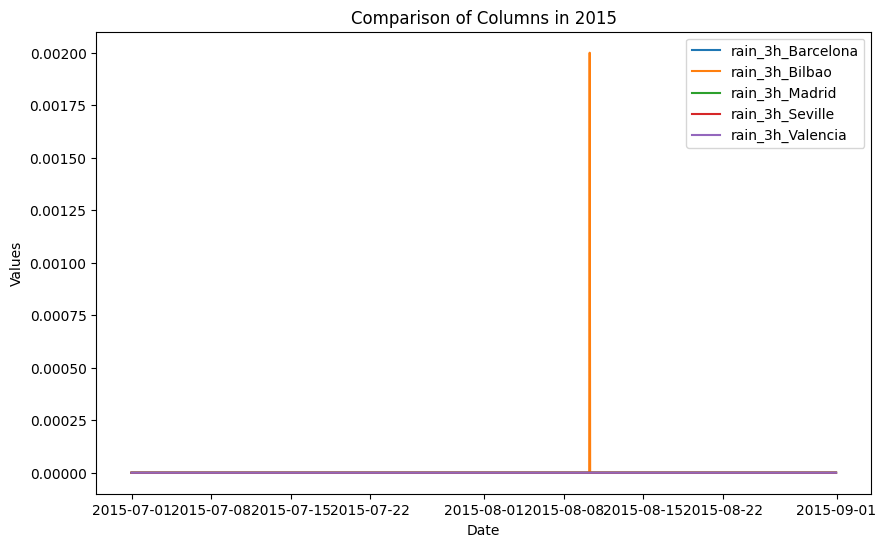

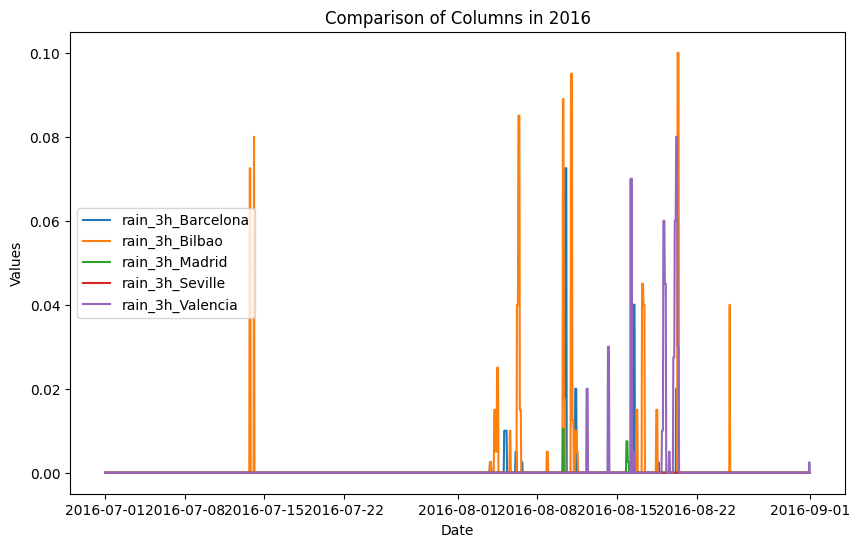

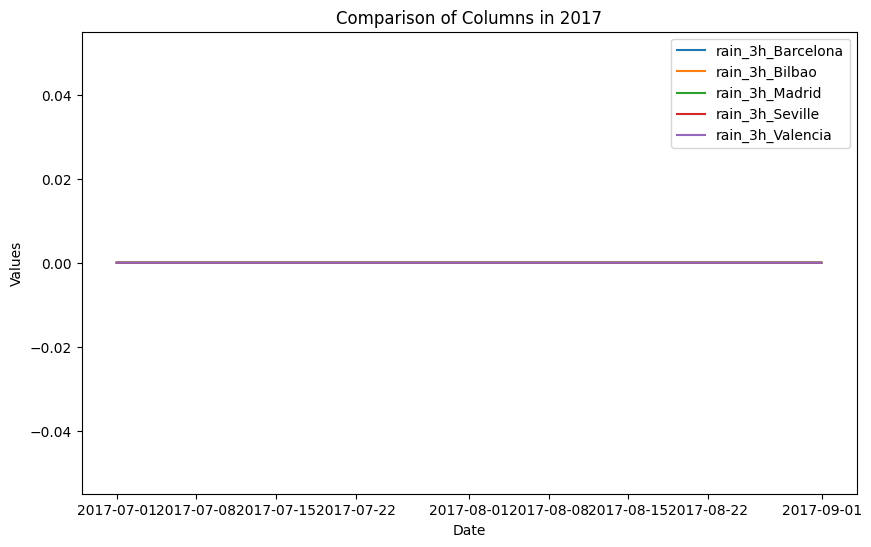

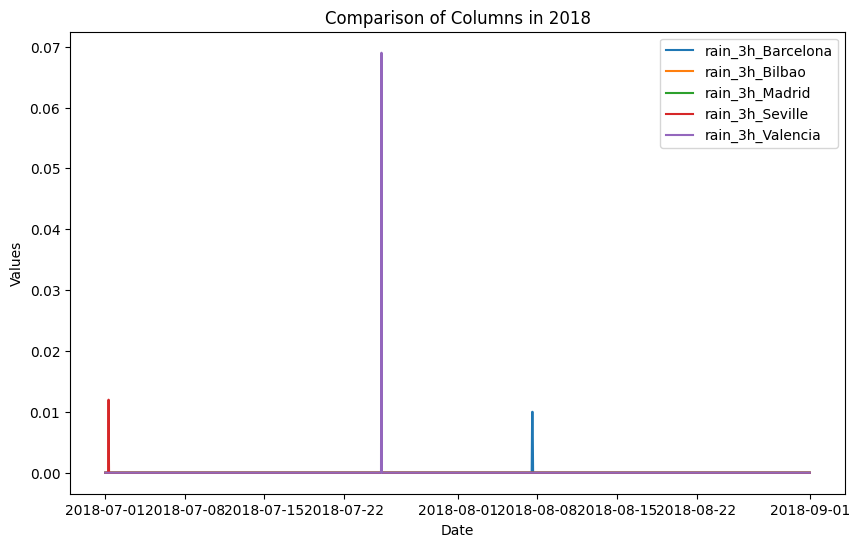

In [53]:
# Extract years from the dateindex
final['year'] = final.index.year

# Create a separate graph for each year
for year in range(2015, 2019):
    # Filter data for the specific year
    year_data = final[(final['year'] == year) & ((final.index.month == 7) | (final.index.month == 8))]

    # Plot a line graph for each column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for column in final[["rain_3h_Barcelona", "rain_3h_Bilbao", "rain_3h_Madrid", "rain_3h_Seville", "rain_3h_Valencia"]]:
        plt.plot(year_data.index, year_data[column], label=column)

    plt.title(f'Comparison of Columns in {year}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


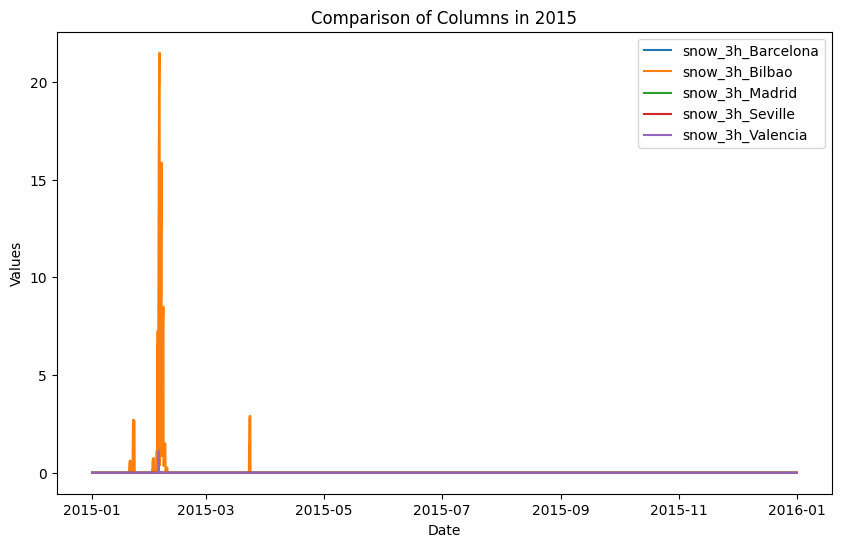

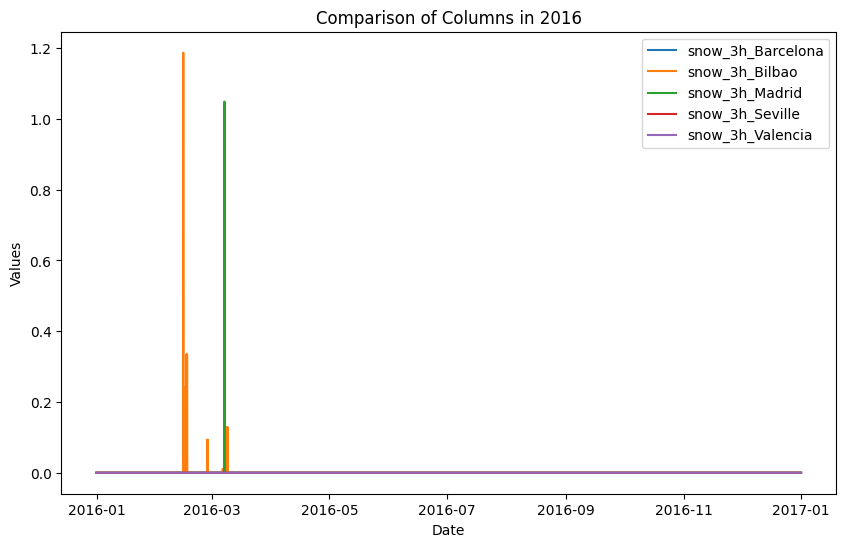

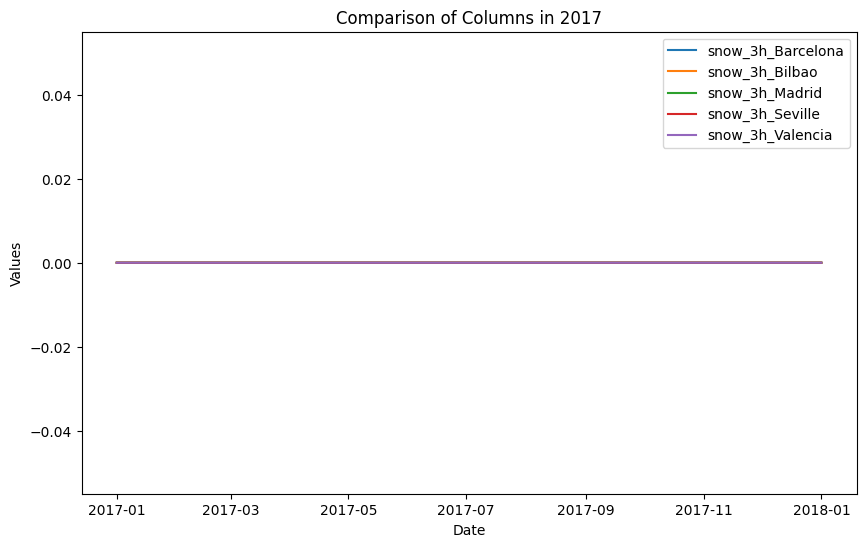

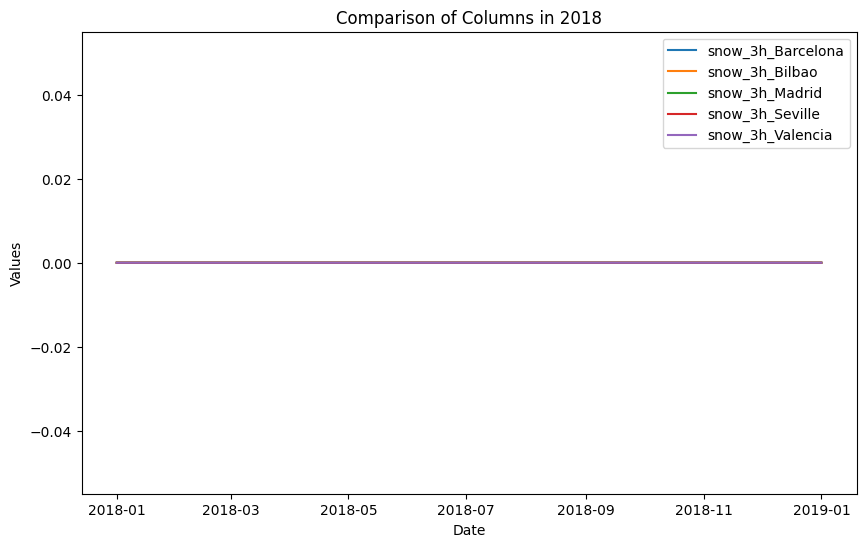

In [ ]:
# Extract years from the dateindex
final['year'] = final.index.year

# Create a separate graph for each year
for year in range(2015, 2019):
    # Filter data for the specific year
    year_data = final[final['year'] == year]

    # Plot a line graph for each column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for column in final[["snow_3h_Barcelona", "snow_3h_Bilbao", "snow_3h_Madrid", "snow_3h_Seville", "snow_3h_Valencia"]]:
        plt.plot(year_data.index, year_data[column], label=column)

    plt.title(f'Comparison of Columns in {year}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

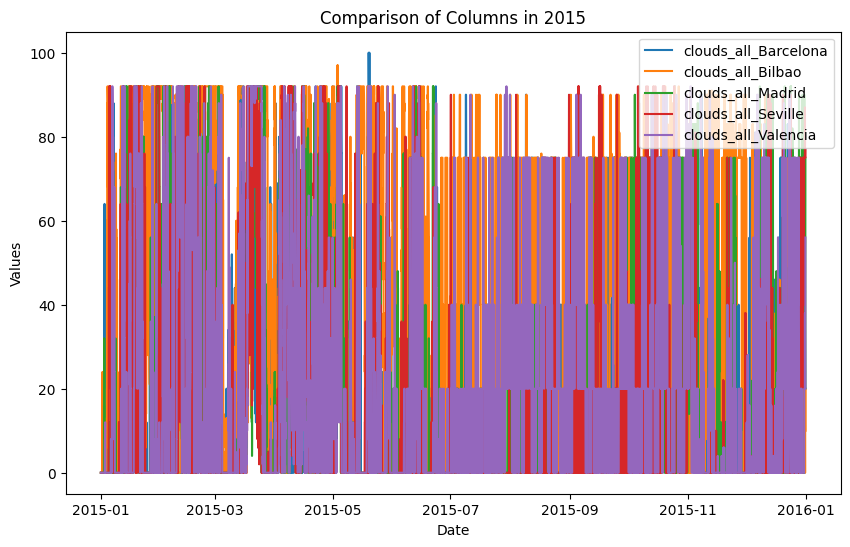

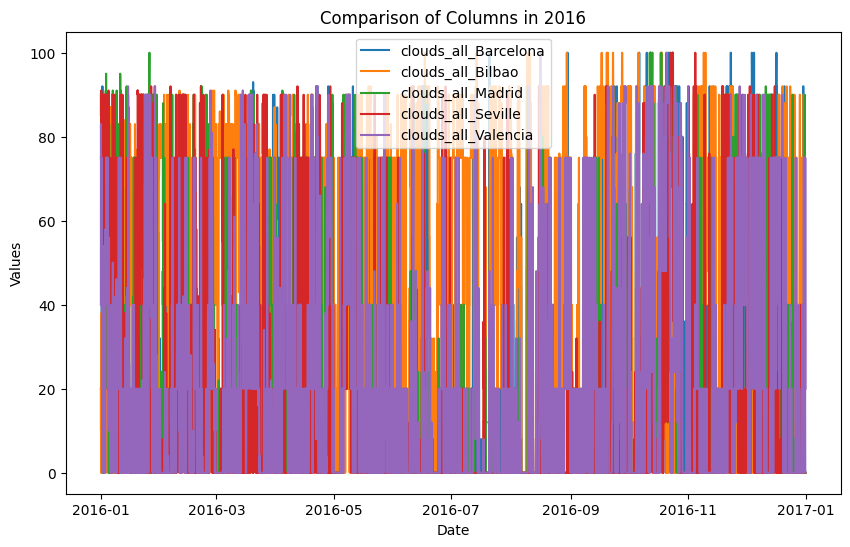

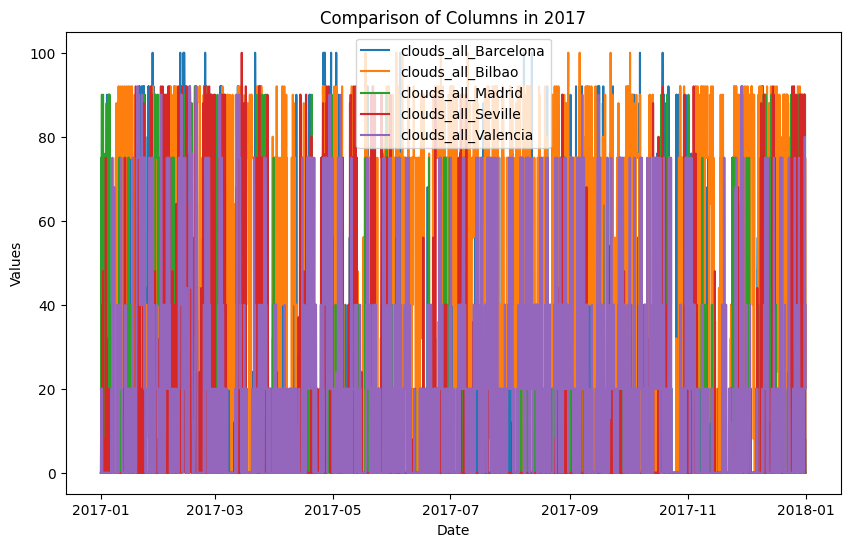

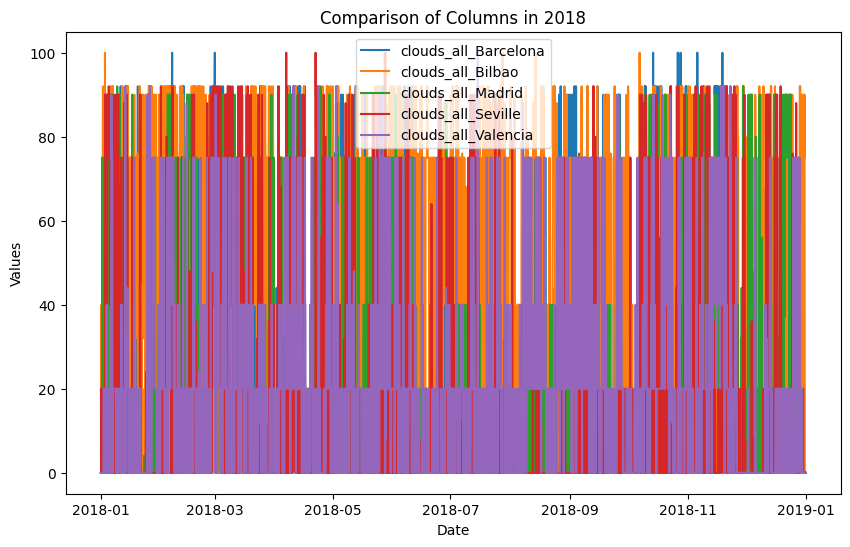

In [ ]:
# Extract years from the dateindex
final['year'] = final.index.year

# Create a separate graph for each year
for year in range(2015, 2019):
    # Filter data for the specific year
    year_data = final[final['year'] == year]

    # Plot a line graph for each column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for column in final[["clouds_all_Barcelona", "clouds_all_Bilbao", "clouds_all_Madrid", "clouds_all_Seville", "clouds_all_Valencia"]]:
        plt.plot(year_data.index, year_data[column], label=column)

    plt.title(f'Comparison of Columns in {year}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

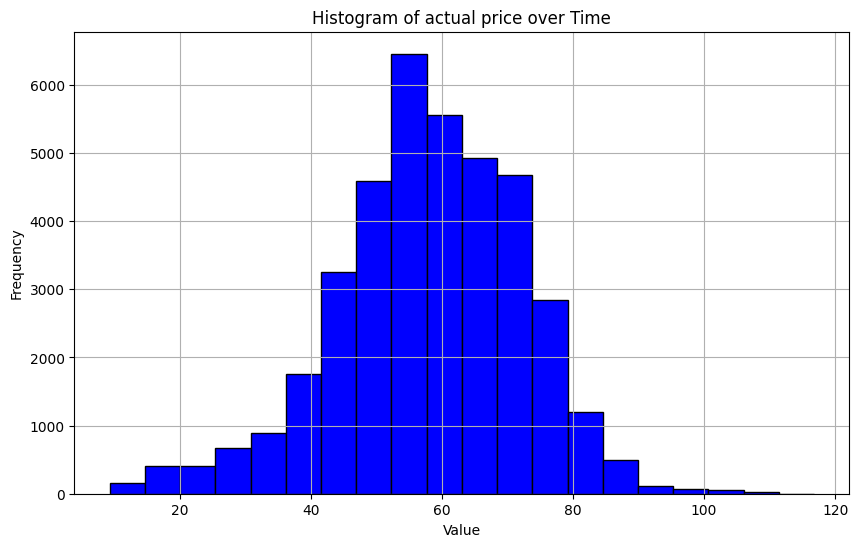

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your time series data with a date index
# df = pd.read_csv('your_dataset.csv', parse_dates=['date_column'], index_col='date_column')

# Plot histogram
plt.figure(figsize=(10, 6))
final['price actual'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Histogram of actual price over Time')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


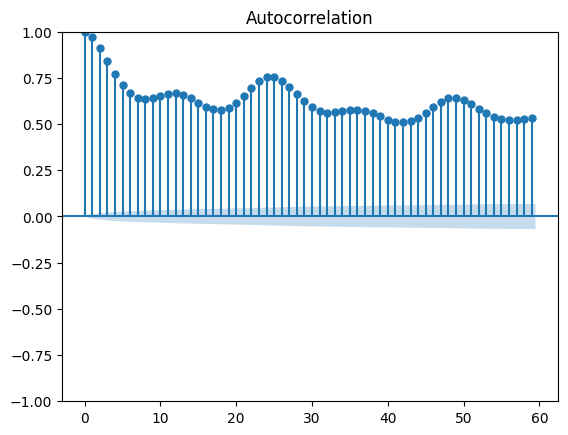

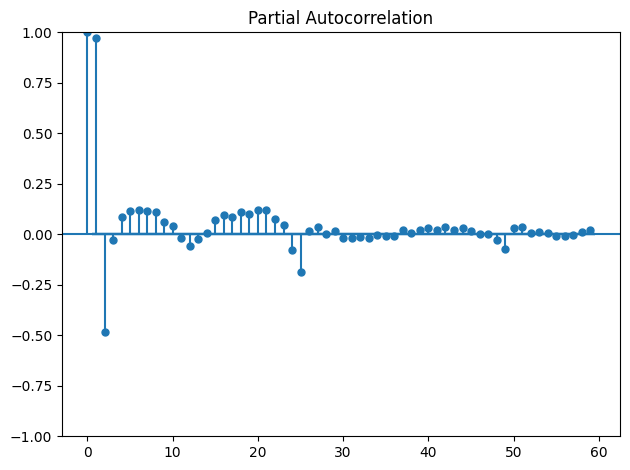

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(final['price actual'], lags=59)
plot_pacf(final['price actual'], lags=59)
plt.tight_layout()
plt.show()


In [56]:
from statsmodels.tsa.arima.model import ARIMA
p=d=q=1
model = ARIMA(final['price actual'], order=(p, d, q))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
forecast = results.get_forecast(steps=4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


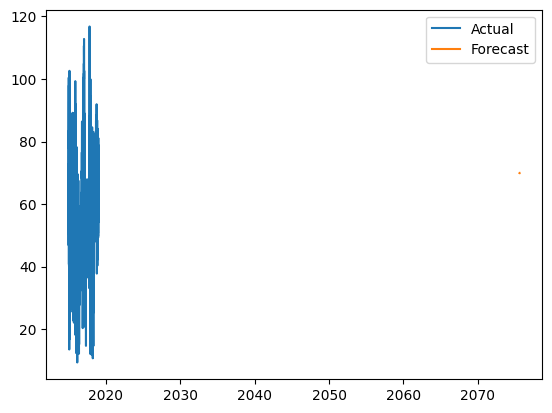

In [58]:
plt.plot(final['price actual'], label='Actual')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.legend()
plt.show()


### Decompose the Time Series

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

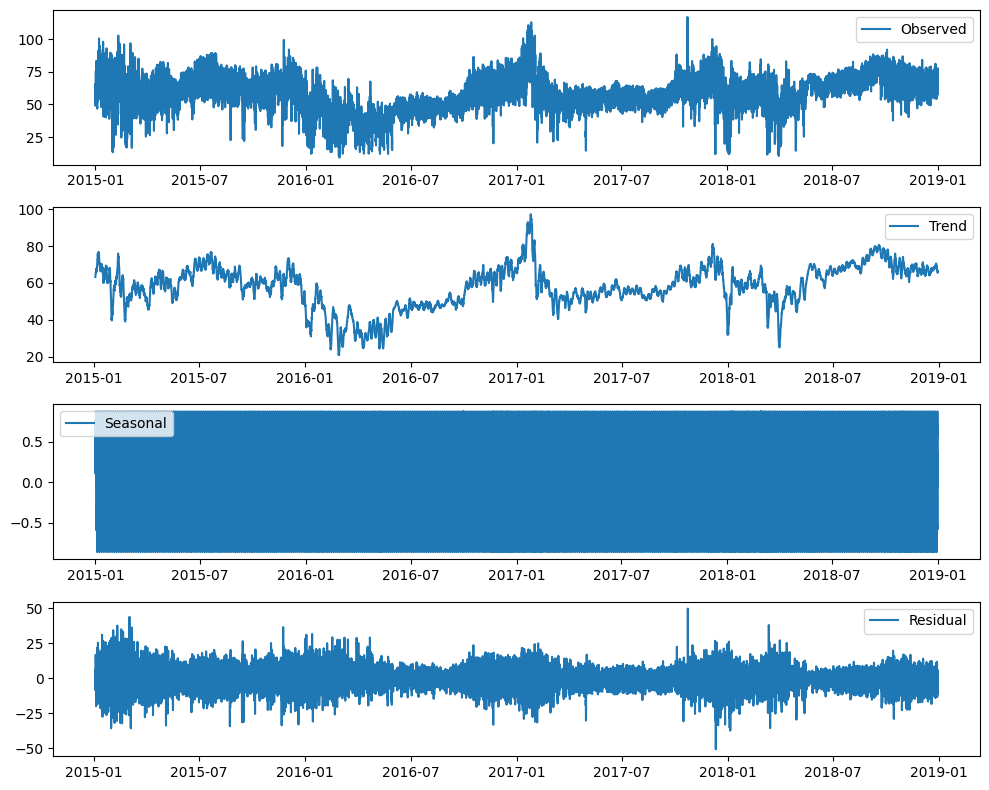

In [87]:
# Perform decomposition
result = seasonal_decompose(final['price actual'], model='additive',period= 90)

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


### Stationarity Test

In [88]:
# ADF test for stationarity
result_adf = adfuller(final['price actual'])

print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

if result_adf[1] <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')


ADF Statistic: -9.442982894404677
p-value: 4.838678432648165e-16
Critical Values: {'1%': -3.430519805933227, '5%': -2.861615050241838, '10%': -2.566809946847465}
The time series is likely stationary.


## Split dataset and MinMaxScaler

Now we can split dataset and fit with CNN model to predict actual price

In [59]:
#import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense


In [60]:
# Assuming 'price_actual' is your target variable
target_variable = 'price actual'

In [61]:
# Extract features and target variable
features = final.drop(columns=[target_variable])
target = final[target_variable]


In [62]:
from sklearn.preprocessing import MinMaxScaler
# Normalize features to the range [0, 1]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [64]:
# Reshape the data to fit the expected input shape for a 1D CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## CNN model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [66]:
model = Sequential()
# Convolution
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# Pooling
model.add(MaxPooling1D(pool_size=2))
# Flatten the layer
model.add(Flatten())
# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

In [67]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [68]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
965/965 [==============================] - 8s 7ms/step - loss: 265.0617 - mae: 11.6813 - val_loss: 135.2923 - val_mae: 9.1414
Epoch 2/10
965/965 [==============================] - 5s 6ms/step - loss: 109.2924 - mae: 8.0135 - val_loss: 101.1517 - val_mae: 7.6475
Epoch 3/10
965/965 [==============================] - 6s 6ms/step - loss: 93.1445 - mae: 7.2605 - val_loss: 88.3783 - val_mae: 7.0048
Epoch 4/10
965/965 [==============================] - 6s 6ms/step - loss: 83.7073 - mae: 6.7675 - val_loss: 80.6149 - val_mae: 6.5753
Epoch 5/10
965/965 [==============================] - 5s 5ms/step - loss: 77.6199 - mae: 6.4479 - val_loss: 76.8604 - val_mae: 6.3674
Epoch 6/10
965/965 [==============================] - 7s 7ms/step - loss: 73.5850 - mae: 6.2251 - val_loss: 72.2818 - val_mae: 6.1565
Epoch 7/10
965/965 [==============================] - 5s 6ms/step - loss: 71.6555 - mae: 6.1371 - val_loss: 74.4686 - val_mae: 6.3327
Epoch 8/10
965/965 [==============================] - 7s 

In [81]:
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Mean Squared Error on Test Set: {loss}')


242/242 [==============================] - 1s 6ms/step - loss: 67.8836 - mae: 5.9265
Mean Squared Error on Test Set: [67.88362121582031, 5.926539897918701]


In [69]:
# Evaluate the model using RMSE
predictions = model.predict(X_test_reshaped)

242/242 [==============================] - 1s 2ms/step


In [70]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')

Root Mean Squared Error (RMSE) on Test Set: 8.239152998503332


In [71]:
# Evaluate the model
mse, mae = model.evaluate(X_test_reshaped, y_test)
print(f'Mean Squared Error on Test Set: {mse}')
print(f'Mean Absolute Error on Test Set: {mae}')

242/242 [==============================] - 1s 3ms/step - loss: 67.8836 - mae: 5.9265
Mean Squared Error on Test Set: 67.88362121582031
Mean Absolute Error on Test Set: 5.926539897918701


In [72]:
# Make predictions
predictions = model.predict(X_test_reshaped)

242/242 [==============================] - 1s 2ms/step


In [75]:
predictions

array([[65.87621 ],
       [63.36901 ],
       [46.15872 ],
       ...,
       [60.439728],
       [37.882446],
       [71.55667 ]], dtype=float32)

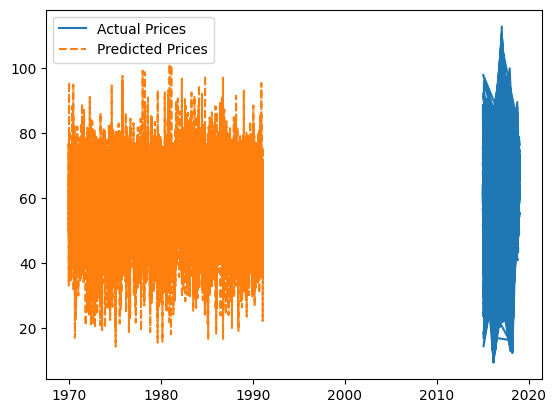

In [82]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices', linestyle='--')
plt.legend()
plt.show()
